In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

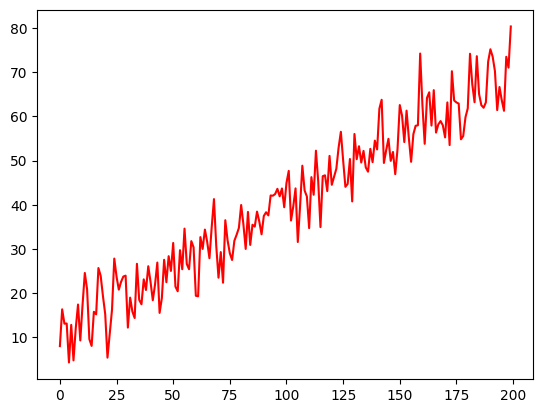

In [4]:
def LinearTrend(b0, b1, s, n):
    Ly = []
    for t in range(n):
        yt = b0+b1*t+np.random.normal(0, s)
        Ly.append(yt)
    plt.plot(Ly, "r")
    plt.show()
    return Ly

xt = LinearTrend(10, 0.3, 5, 200)

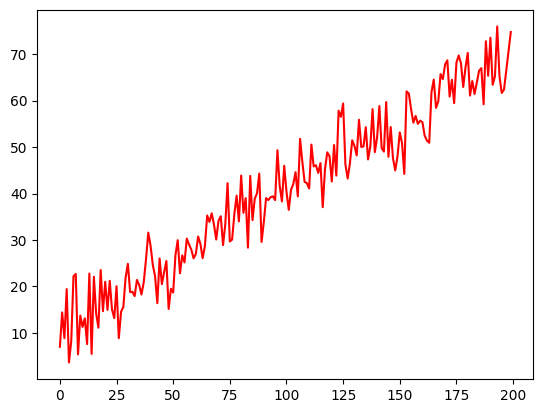

In [9]:
xt = LinearTrend(10, 0.3, 5, 200)
def OLSE(D): #D=data
    n = len(D)
    x = np.array(D)
    z = np.linspace(0, n-1, n)
    A = [[n, sum(z)], [sum(z), sum(z**2)]]
    B = [sum(x), sum(x*z)]
    A_inv = np.linalg.inv(A)
    olse = np.dot(A_inv, B)
    return olse

In [10]:
print(OLSE(xt))

[10.91286341  0.29763572]


In [13]:
def Fitting(D):
    n = len(D)
    olse = OLSE(D)
    plt.plot(D, 'r')
    z = np.linspace(0, n-1, n)
    y = olse[0] + olse[1]*z
    plt.plot(y, 'b')
    plt.show()

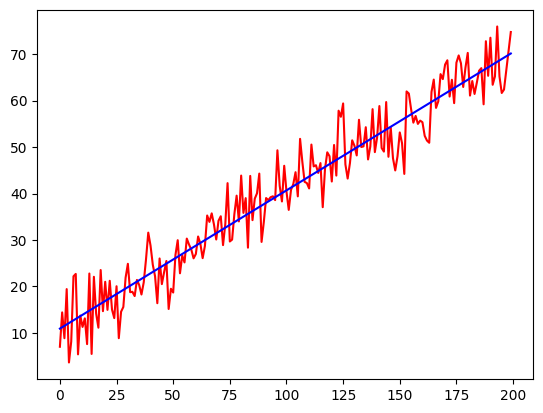

In [14]:
Fitting(xt)

In [22]:
wt = np.random.normal(0, 1, 500)
def KernelSmoothing(D, b): #b=bandwidth
    L = []
    n = len(D)
    x = D
    for t in range(n):
        Lt, Lt2 = [], []
        for j in range(n):
            K_jt = norm.pdf((j-t)/b)
            Lt.append(K_jt)
        Den = sum(Lt) # weight의 분모
        for i in range(n):
            w_it = Lt[i] / Den # m_t = sum_{i=1}`n w(i, t)x_i
            wx_it = w_it*x[i]
            Lt2.append(wx_it)
        mt = sum(Lt2)
        L.append(mt)
    plt.plot(D, 'c')
    plt.plot(L, 'r')
    plt.show()

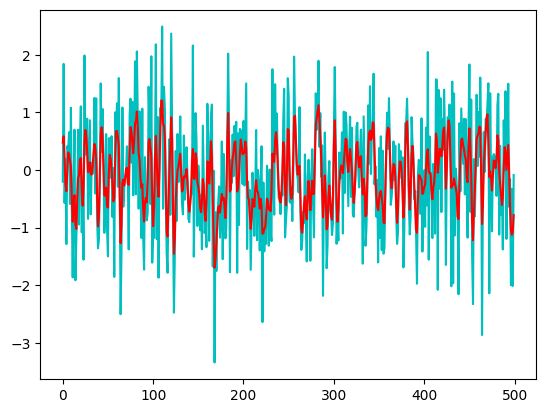

In [23]:
KernelSmoothing(wt, 1)

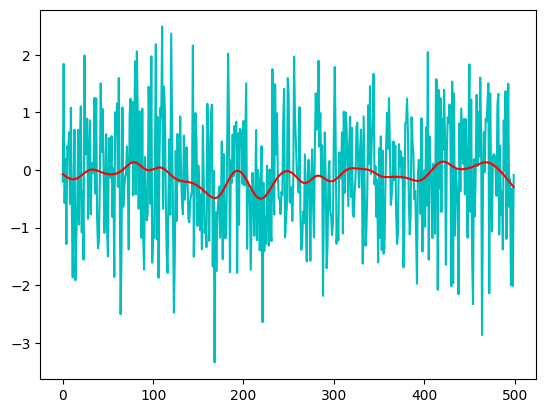

In [24]:
KernelSmoothing(wt, 10)